In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
%matplotlib inline
pd.set_option('display.max_columns', None)


In [50]:
df = pd.read_csv(r"C:\Users\artur\Documents\ny-housing-ml-llm\airflow_server\dags\data\ny_house_dataset.csv")

In [51]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [41]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [42]:
df["BATH"].value_counts()

BATH
2.000000     1671
1.000000     1521
4.000000      484
3.000000      467
2.373861      302
6.000000      142
5.000000      100
8.000000       45
7.000000       24
10.000000      16
9.000000        7
16.000000       5
20.000000       3
12.000000       3
0.000000        3
11.000000       2
32.000000       1
13.000000       1
50.000000       1
24.000000       1
43.000000       1
17.000000       1
Name: count, dtype: int64

In [43]:
df["BEDS"].value_counts()

BEDS
3     1456
2      995
1      820
4      570
5      360
6      271
7      105
8       84
9       39
12      23
10      21
11      20
14       7
15       5
13       5
16       4
20       3
24       3
32       2
35       1
50       1
36       1
42       1
40       1
30       1
19       1
18       1
Name: count, dtype: int64

<Axes: xlabel='LATITUDE', ylabel='LONGITUDE'>

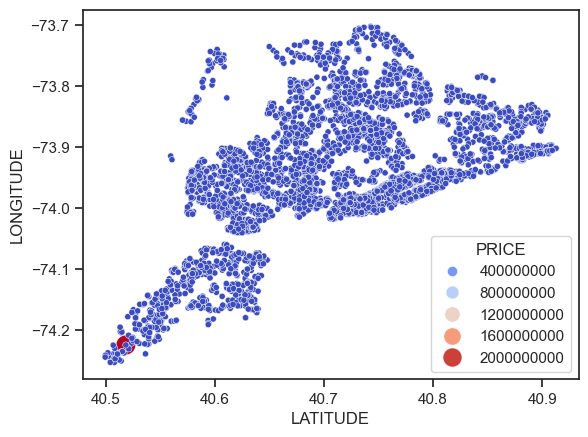

In [53]:
sns.scatterplot(data=df, x='LATITUDE', y='LONGITUDE', hue='PRICE', size='PRICE', palette='coolwarm', sizes=(20, 200))

<Axes: xlabel='LATITUDE', ylabel='LONGITUDE'>

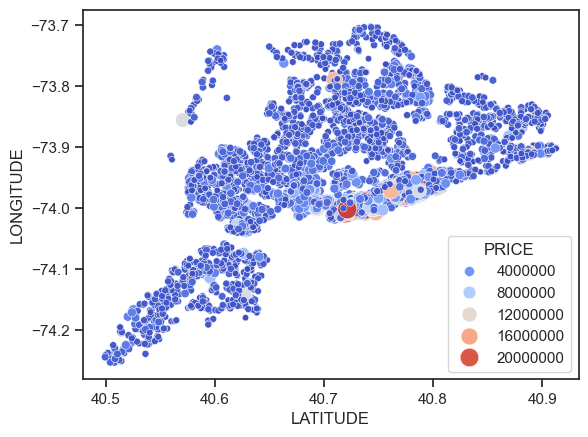

In [61]:
sns.scatterplot(data=df.loc[df['PRICE'] <= np.percentile(df['PRICE'], 99)], x='LATITUDE', y='LONGITUDE', hue='PRICE', size='PRICE', palette='coolwarm', sizes=(20, 200))

<Axes: xlabel='PRICE'>

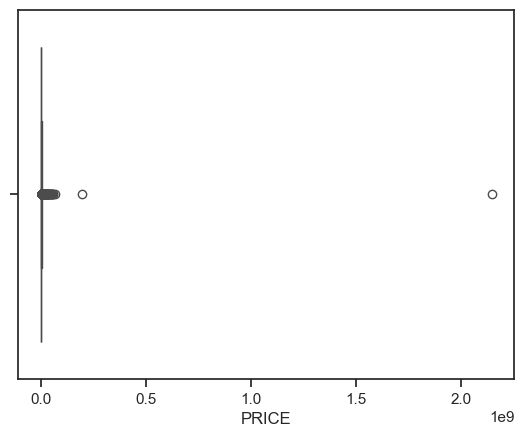

In [54]:
sns.boxplot(data=df, x='PRICE')

<Axes: xlabel='PRICE'>

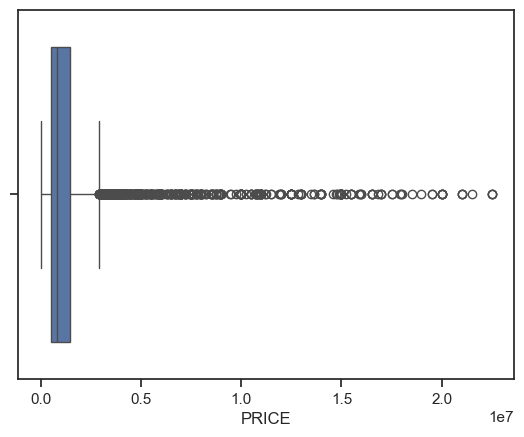

In [60]:
sns.boxplot(data=df.loc[df['PRICE'] <= np.percentile(df['PRICE'], 99)], x='PRICE')

In [53]:
bath_beds_ratio = df["BATH"] / df["BEDS"]
bath_sqrt_ratio = df["BATH"] / df['PROPERTYSQFT']
beds_sqrt_ratio = df["BEDS"] / df['PROPERTYSQFT']

df["BATH_BEDS_RATIO"] = bath_beds_ratio
df["BATH_PROPERTYSQFT_RATIO"] = bath_sqrt_ratio
df["BEDS_PROPERTYSQFT_RATIO"] = beds_sqrt_ratio

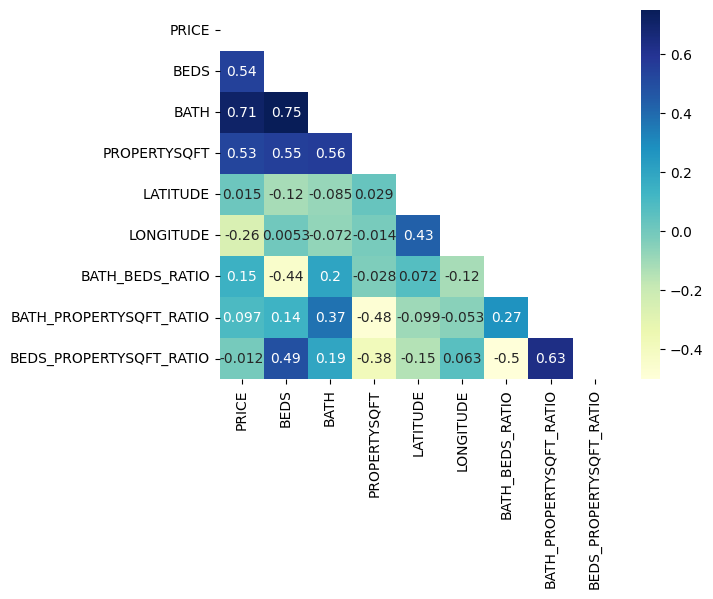

In [73]:
numeric_columns = [c for c in df.columns if df[c].dtype in ('float64', 'int64')]

mask = np.triu(np.ones_like(df[numeric_columns].corr(method='spearman')))
dataplot=sns.heatmap(df[numeric_columns].corr(method='spearman'), cmap="YlGnBu", annot=True, mask=mask)

In [74]:
outliers_filers = (df['PRICE'] <= np.percentile(df['PRICE'], 99)) & (df["BEDS"] <= 32) & (df["BATH"] <= 11)

df_exp = df.loc[outliers_filers]

mms = MinMaxScaler()

df_exp[numeric_columns] = mms.fit_transform(df_exp[numeric_columns])

C:\Users\artur\AppData\Local\Temp\ipykernel_33884\4104135947.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp[numeric_columns] = mms.fit_transform(df_exp[numeric_columns])


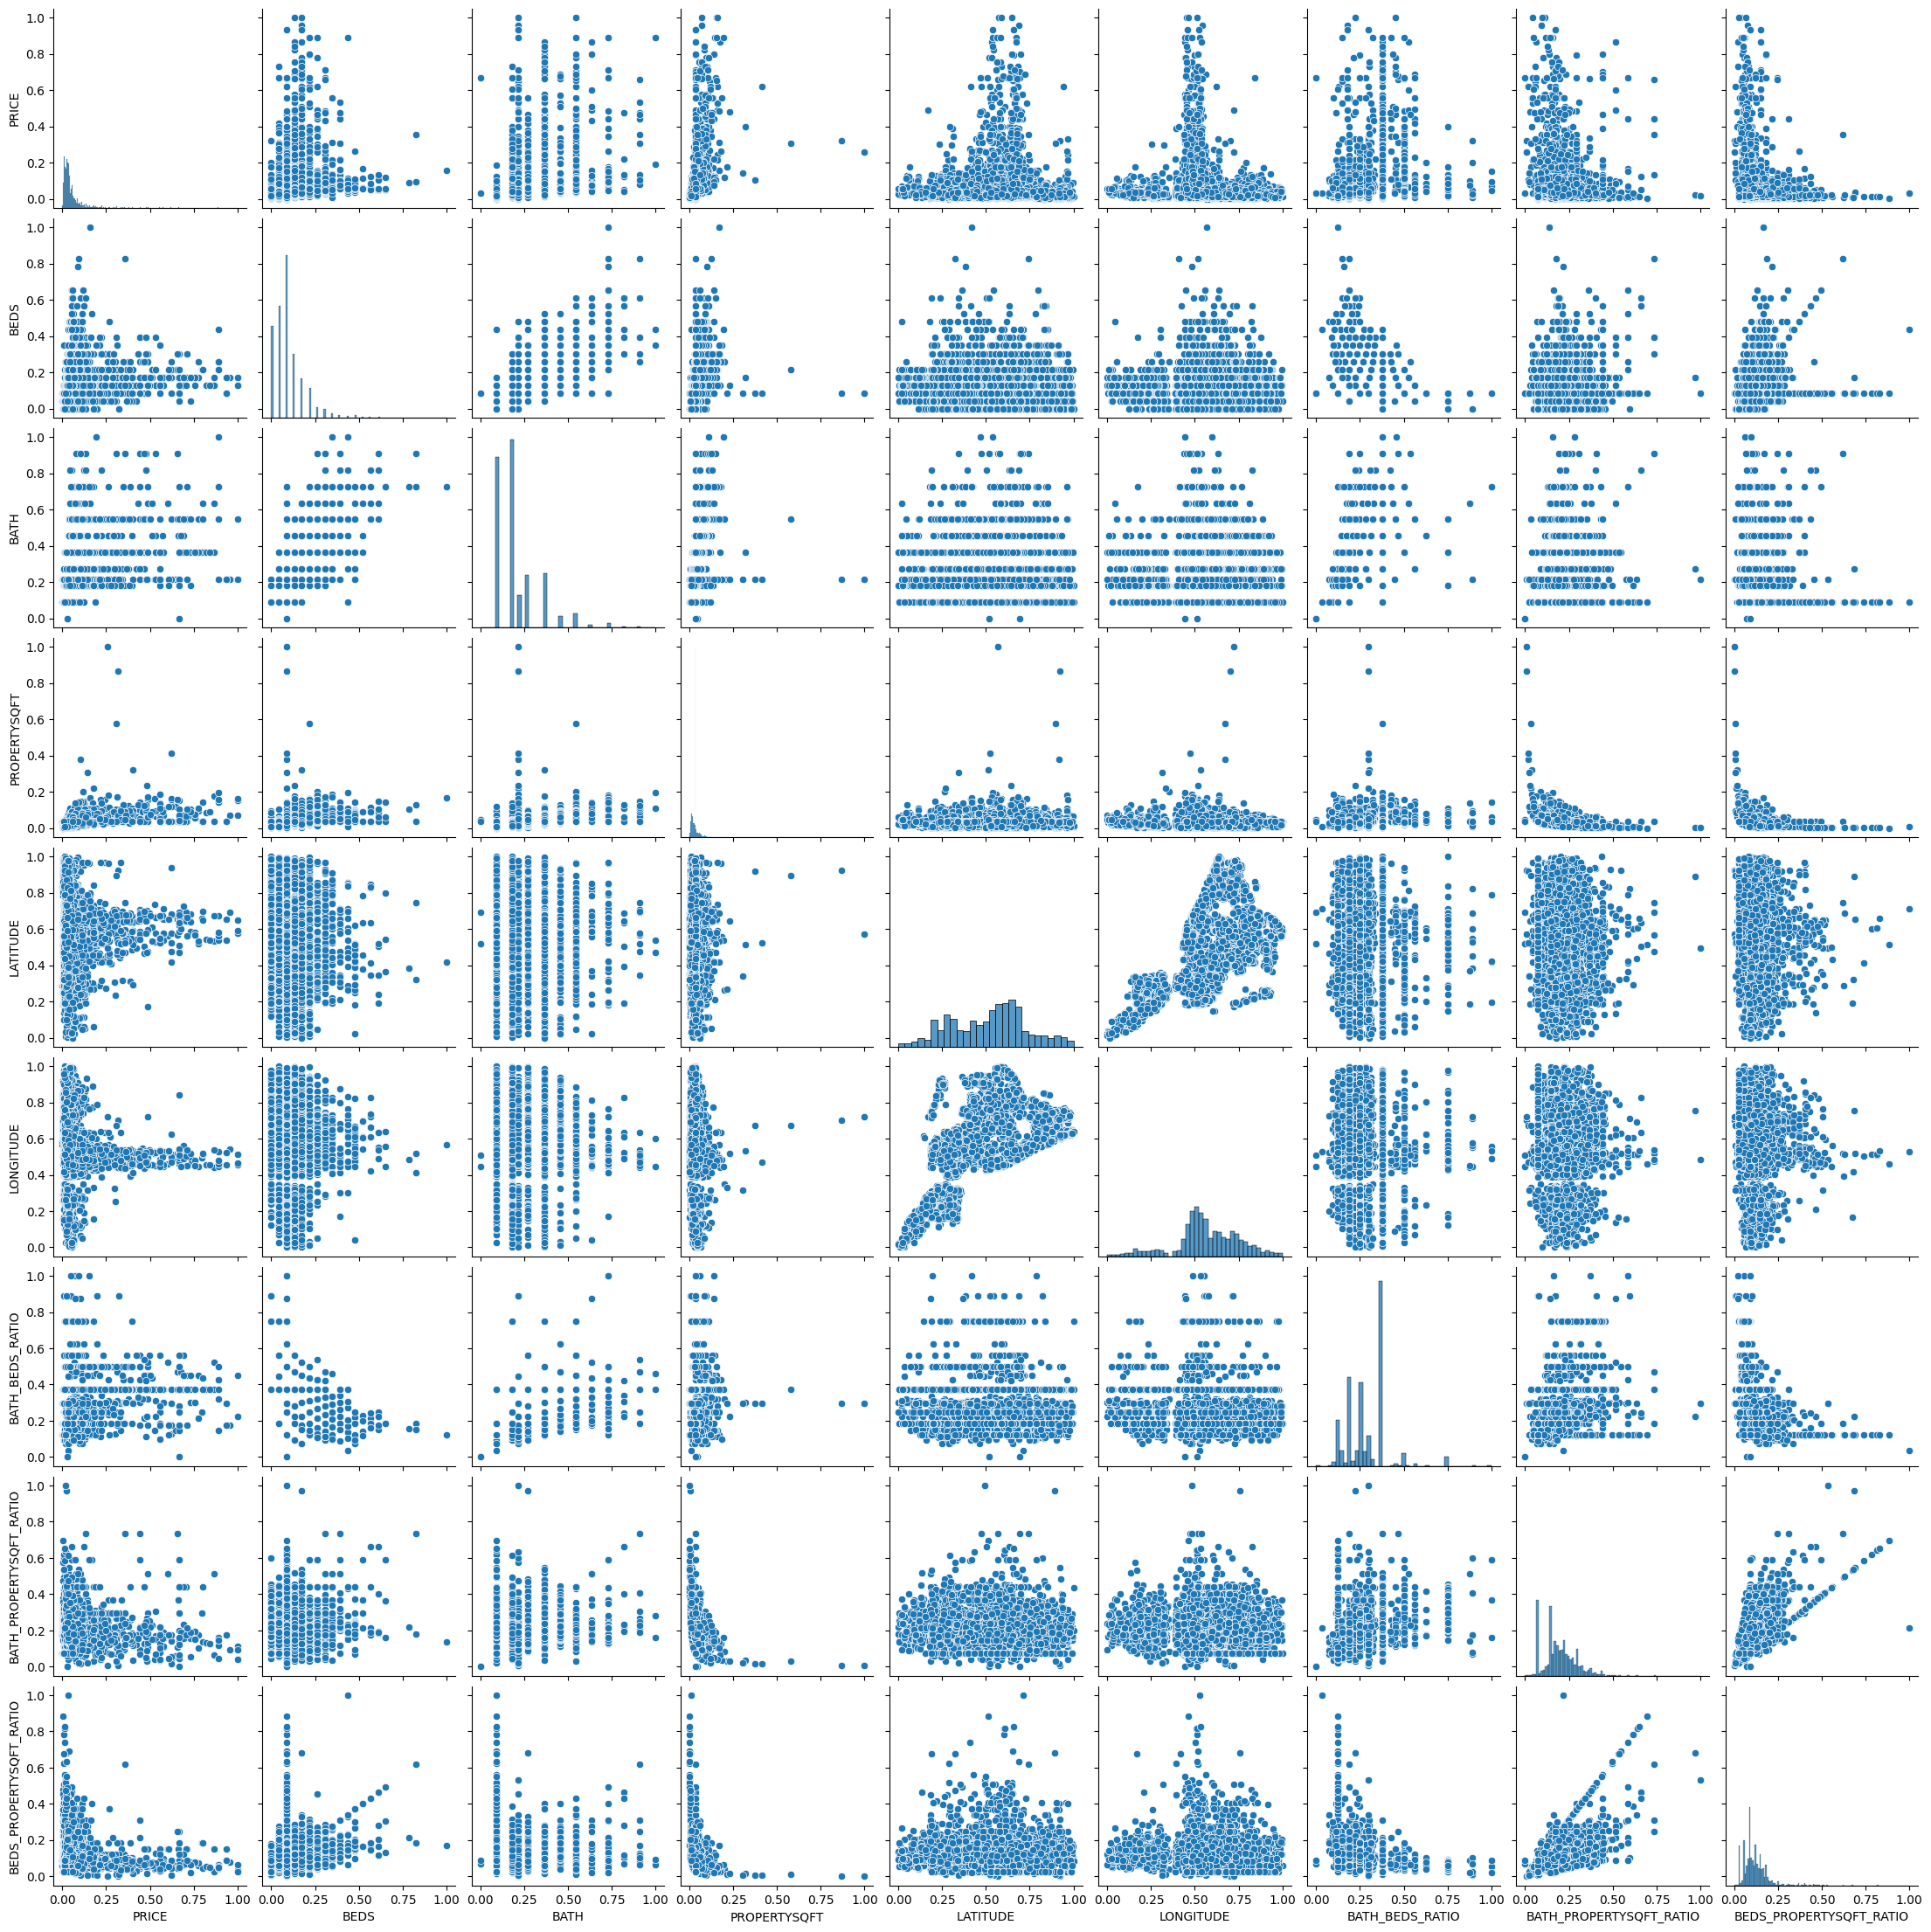

In [75]:
sns.pairplot(data=df_exp)

In [ ]:
df = df.loc[outliers_filers]

y = df["PRICE"]
X = df[["BATH", "LATITUDE", "LONGITUDE", "BEDS_PROPERTYSQFT_RATIO"]]
#X = df[["BATH", "BEDS", "PROPERTYSQFT", "LATITUDE", "LONGITUDE"]]

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42
    )


for model_type in ["xgboost", "random_forest"]:
    if model_type == "xgboost":
        model = xgb.XGBRegressor(random_state=42)
    else:
        model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("====================================")
    print("====================================")
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"For {model_type}:\n")
    print(f"MSE = {round(mse, 2)}")
    print(f"MAE = {round(mae, 2)}\n")
    print("====================================")
    print("====================================")


For xgboost:

MSE = 1772610214810.85
MAE = 591256.02

For random_forest:

MSE = 1560191685880.95
MAE = 533228.29



In [77]:
y = df["PRICE"]
#X = df[["BATH", "LATITUDE", "LONGITUDE", "BEDS_PROPERTYSQFT_RATIO"]]
X = df[["BATH", "BEDS", "PROPERTYSQFT", "LATITUDE", "LONGITUDE"]]

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42
    )


for model_type in ["xgboost", "random_forest"]:
    if model_type == "xgboost":
        model = xgb.XGBRegressor(random_state=42)
    else:
        model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("====================================")
    print("====================================")
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"For {model_type}:\n")
    print(f"MSE = {round(mse, 2)}")
    print(f"MAE = {round(mae, 2)}\n")
    print("====================================")
    print("====================================")

For xgboost:

MSE = 1431947914570.32
MAE = 514131.88

For random_forest:

MSE = 1248512227656.51
MAE = 472073.09



In [105]:

import pandas as pd
from sqlalchemy import create_engine, text
from sqlalchemy.engine import URL
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

DB_USER='dbuser'
DB_PASSWORD='urlonRXlh5klx1sNLwWDcKY941tAzjsN'
DB_HOST='dpg-ctknah3v2p9s738a0hsg-a.virginia-postgres.render.com'
DB_PORT=5432
DB_NAME='db_ny_prices'

def extract_data_postgresql(select_query):

    try:
        url = URL.create(
            drivername="postgresql",
            username=DB_USER,
            password=DB_PASSWORD,
            host=DB_HOST,
            port=DB_PORT,
            database=DB_NAME
        )

        # Create engine
        engine = create_engine(url)

        with engine.begin() as connection:
            result = connection.execute(text(select_query))
            
            rows = result.fetchall()
            
            df = pd.DataFrame(rows, columns=result.keys())

        engine.dispose()
        print("Database connection closed.")

        return df
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        
    finally:
        engine.dispose()
        print("Database connection closed.")

In [119]:
regions = ["The Bronx"]

In [123]:
select_query = f"""
SELECT
    SUBLOCALITY,
    percentile_cont(0.5) WITHIN GROUP (
    ORDER BY PRICE
    ) AS MED_PRICE,
    percentile_cont(0.5) WITHIN GROUP (
    ORDER BY PROPERTYSQFT
    ) AS MED_PROPERTYSQFT,
    COUNT(*) AS N_HOUSES
FROM ny_datasets.original_data
WHERE SUBLOCALITY = '{regions[0]}'
GROUP BY SUBLOCALITY
"""
df = extract_data_postgresql(select_query)

Database connection closed.
Database connection closed.


In [135]:
target = 'price'
features = ["bath", "beds", "propertysqft", "latitude", "longitude"]

all_columns = features
all_columns.append(target)

for c in all_columns:
    df[c] = pd.to_numeric(df[c], errors='coerce')

In [136]:
df.head(15)

,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000.0,2.0,2.00,1400.00,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000.0,7.0,10.00,17545.00,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000.0,4.0,2.00,2015.00,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000.0,3.0,1.00,445.00,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000.0,7.0,2.37,14175.00,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
5,Brokered by Sowae Corp,House for sale,690000.0,5.0,2.00,4004.00,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500.0,2.0,2.00,2184.21,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.809448,-73.946777
7,Brokered by Connie Profaci Realty,House for sale,16800000.0,8.0,16.00,33000.00,177 Benedict Rd,"Staten Island, NY 10304","177 Benedict RdStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Benedict Road,"177 Benedict Rd, Staten Island, NY 10304, USA",40.595002,-74.106424
8,Brokered by Pantiga Group Inc.,Co-op for sale,265000.0,1.0,1.00,750.00,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089
9,Brokered by CENTURY 21 MK Realty,Co-op for sale,440000.0,2.0,1.00,978.00,1350 Ocean Pkwy Apt 5G,"Brooklyn, NY 11230","1350 Ocean Pkwy Apt 5GBrooklyn, NY 11230",New York,Kings County,Brooklyn,Midwood,1350,"1350 Ocean Pkwy #5g, Brooklyn, NY 11230, USA",40.615738,-73.969694


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brokertitle                  4801 non-null   object 
 1   type                         4801 non-null   object 
 2   price                        4801 non-null   float64
 3   beds                         4801 non-null   float64
 4   bath                         4801 non-null   float64
 5   propertysqft                 4801 non-null   float64
 6   address                      4801 non-null   object 
 7   state                        4801 non-null   object 
 8   main_address                 4801 non-null   object 
 9   administrative_area_level_2  4801 non-null   object 
 10  locality                     4801 non-null   object 
 11  sublocality                  4801 non-null   object 
 12  street_name                  4801 non-null   object 
 13  long_name         

In [177]:
df["sublocality"].unique()

array(['Manhattan', 'New York County', 'Richmond County', 'Kings County',
       'New York', 'East Bronx', 'Brooklyn', 'The Bronx', 'Queens',
       'Staten Island', 'Queens County', 'Bronx County', 'Coney Island',
       'Brooklyn Heights', 'Jackson Heights', 'Riverdale', 'Rego Park',
       'Fort Hamilton', 'Flushing', 'Dumbo', 'Snyder Avenue'],
      dtype=object)

In [142]:
df_test = df.head(1)

In [158]:
df_test

,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000.0,2.0,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483


In [166]:
rows = [tuple(list(df_test))]

In [167]:
rows

[('brokertitle',
  'type',
  'price',
  'beds',
  'bath',
  'propertysqft',
  'address',
  'state',
  'main_address',
  'administrative_area_level_2',
  'locality',
  'sublocality',
  'street_name',
  'long_name',
  'formatted_address',
  'latitude',
  'longitude')]

In [98]:
from datetime import datetime

current_date = datetime.today().date().strftime("%Y-%m-%d")

In [99]:
current_date

'2024-12-27'

In [151]:
data_dict = df_test.to_dict('records')

In [100]:
data_dict = {'brokertitle': 'Brokered by Douglas Elliman  -111 Fifth Ave',
  'type': 'Condo for sale',
  'price': 315000.0,
  'beds': 2.0,
  'bath': 2.0,
  'propertysqft': 1400.0,
  'address': '2 E 55th St Unit 803',
  'state': 'New York, NY 10022',
  'main_address': '2 E 55th St Unit 803New York, NY 10022',
  'administrative_area_level_2': 'New York County',
  'locality': 'New York',
  'sublocality': 'Manhattan',
  'street_name': 'East 55th Street',
  'long_name': 'Regis Residence',
  'formatted_address': 'Regis Residence, 2 E 55th St #803, New York, NY 10022, USA',
  'latitude': 40.761255,
  'longitude': -73.9744834}

In [102]:
[data_dict]

[{'brokertitle': 'Brokered by Douglas Elliman  -111 Fifth Ave',
  'type': 'Condo for sale',
  'price': 315000.0,
  'beds': 2.0,
  'bath': 2.0,
  'propertysqft': 1400.0,
  'address': '2 E 55th St Unit 803',
  'state': 'New York, NY 10022',
  'main_address': '2 E 55th St Unit 803New York, NY 10022',
  'administrative_area_level_2': 'New York County',
  'locality': 'New York',
  'sublocality': 'Manhattan',
  'street_name': 'East 55th Street',
  'long_name': 'Regis Residence',
  'formatted_address': 'Regis Residence, 2 E 55th St #803, New York, NY 10022, USA',
  'latitude': 40.761255,
  'longitude': -73.9744834}]

In [ ]:
df["BATH"].value_counts()

BATH
2.000000     1671
1.000000     1521
4.000000      484
3.000000      467
2.373861      302
6.000000      142
5.000000      100
8.000000       45
7.000000       24
10.000000      16
9.000000        7
16.000000       5
20.000000       3
12.000000       3
0.000000        3
11.000000       2
32.000000       1
13.000000       1
50.000000       1
24.000000       1
43.000000       1
17.000000       1
Name: count, dtype: int64

In [4]:
df_test = df.head(1)
df_test

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483


In [130]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_community.llms import HuggingFaceHub

In [136]:
sublocal = ['The Bronx']

select_query = f"""
SELECT
    SUBLOCALITY,
    percentile_cont(0.5) WITHIN GROUP (
    ORDER BY PRICE
    ) AS MED_PRICE,
    percentile_cont(0.5) WITHIN GROUP (
    ORDER BY PROPERTYSQFT
    ) AS MED_PROPERTYSQFT,
    COUNT(*) AS N_HOUSES
FROM ny_datasets.original_data
WHERE SUBLOCALITY = '{sublocal[0]}'
GROUP BY SUBLOCALITY
"""

df = extract_data_postgresql(select_query)

med_price = float(df["med_price"].values[0])
med_propertysqft = float(df["med_propertysqft"].values[0])
n_houses = int(df["n_houses"].values[0])

Database connection closed.
Database connection closed.


In [153]:
from dotenv import load_dotenv
load_dotenv()

output_parser = StrOutputParser()

pred_price = 22222
propsqft = 1500
sublocality = sublocal[0]

        
llm = HuggingFaceHub(
    repo_id="mistralai/Mistral-7B-Instruct-v0.2",
    model_kwargs={"temperature": 0.7, "max_length": 1024}
)

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are an expert in the New York housing market. You are receiving data that represent the predicted house price based on user inputs along with data that represent price, poperty square foot and number of houses in the sublocality chosen by the user. Analyse these data and build a small, insightful and direct report comparing the predicted price, property square foot and the ratio between them with the data observed in the sublocality. Add more comparisons and analysis as you see fit. Write in english and with simple language. Answer using a continuous text with no new lines. Be extremely direct in your answers. Use a maximum of words of 900."),
        ("user", "question: {question}")
    ]
)

chain = prompt | llm | output_parser

data_input = f"Predicted house price {pred_price} Property area in square foots selected by the user {propsqft} Sublocality (region) of the house selected by the user {sublocality} Median price of the houses in the sublocality (region) selected by the user {med_price} Median property square foot of the houses in the sublocality (region) selected by the user {med_propertysqft} Total number of houses in the sublocality selected by the user {n_houses}."

response = chain.invoke({'question': data_input})

In [154]:
print(response)

System: You are an expert in the New York housing market. You are receiving data that represent the predicted house price based on user inputs along with data that represent price, poperty square foot and number of houses in the sublocality chosen by the user. Analyse these data and build a small, insightful and direct report comparing the predicted price, property square foot and the ratio between them with the data observed in the sublocality. Add more comparisons and analysis as you see fit. Write in english and with simple language. Answer using a continuous text with no new lines. Be extremely direct in your answers. Use a maximum of words of 900.
Human: question: Predicted house price 22222 Property area in square foots selected by the user 1500 Sublocality (region) of the house selected by the user The Bronx Median price of the houses in the sublocality (region) selected by the user 279900.0 Median property square foot of the houses in the sublocality (region) selected by the us